In [1]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 1. Load images

images = [np.asarray(Image.open(f'images/{i}.jpg'))
          for i in range(100)]

# crop images
h, w, _ = images[0].shape
for i, image in enumerate(images):
    images[i] = image[int(h * 0.25):int(h * 0.75),
                      int(w * 0.33):int(w * 0.66)]
h, w, _ = images[0].shape

# gray-scale images
images = [image.mean(axis=2) for image in images]
images[0].shape

(125, 83)

In [3]:
# 2. Construct data matrix
# horizontal stack images
A = np.hstack([image.reshape(-1, 1) for image in images])
A.shape

(10375, 100)

In [4]:
# mean vector of images
mean_vector = A.mean(axis=1).reshape(-1, 1)

# subtract mean vector from images
A -= mean_vector

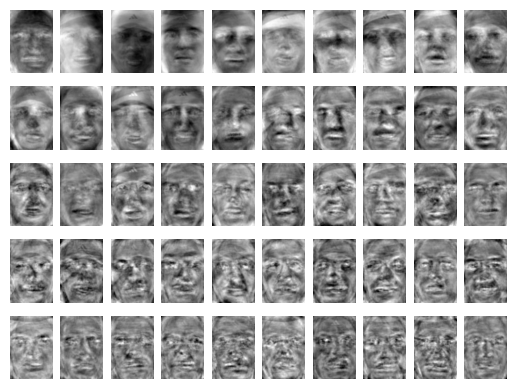

In [5]:

# 3. Apply SVD
U, S, Vh = np.linalg.svd(A, full_matrices=False)

# visualize eigenfaces
number_principal_components = 50
eigenfaces = U[:, :number_principal_components]
for i, eigenface in enumerate(eigenfaces.T):
    plt.subplot(5, 10, i + 1)
    plt.imshow(eigenface.reshape(h, w), cmap='gray')
    plt.axis('off')
plt.show()

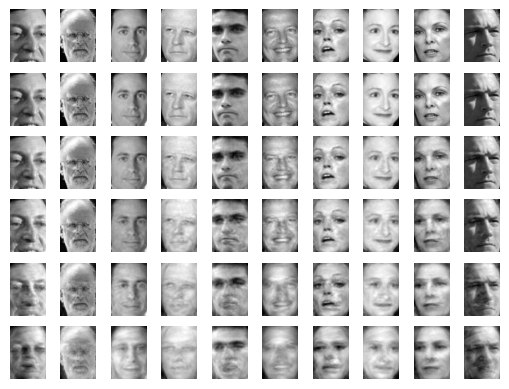

In [6]:

# show original images
for i in range(10):
    plt.subplot(6, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

# show reconstructed images
for i in range(1, 6):
    number_principal_components = (6 - i) * 20
    eigenfaces = U[:, :number_principal_components]

    # 4. Find the coefficients
    coefficients = np.dot(A.T, eigenfaces)

    # 5. Generate face images using eigenfaces
    reconstructed_images = np.dot(eigenfaces, coefficients.T) + mean_vector

    for j in range(10):
        plt.subplot(6, 10, j + 1 + i * 10)
        plt.imshow(reconstructed_images.T[j].reshape(h, w), cmap='gray')
        plt.axis('off')
plt.show()